In this notebook we use Python to draw [colorpleth maps](https://en.wikipedia.org/wiki/Choropleth_map) 

In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
#Standard python library. Manipulates Excel-like tables (called dataframes) with named rows and columns
import pandas as pd

# Data

In [19]:
#reads a table of data given country by country.
df=pd.read_csv("results/results.csv").query("country!='Finland'")
df.head()

,country,gdp_pc_pp,pop,urbanization_rate,prepare_scaleup,borrow_abi,avg_prod_k,T_rebuild_K,pi,income_elast,...,n,shew,social,v,v_shew,dWpc_currency,dWtot_currency,risk,resilience,risk_to_assets
0,Albania,9960.94073,2897366.0,0.57407,0.00000,0.17500,0.18528,3,0.2,1.5,...,3.39034,0.0,1.02493,2.10600,2.10600,142.55657,4.130386e+08,0.01431,0.69007,0.00988
1,Angola,7488.01176,21471618.0,0.44050,0.00000,0.17500,0.43240,3,0.2,1.5,...,3.39753,0.0,0.64707,3.10000,3.10000,35.77273,7.680983e+08,0.00478,0.31209,0.00149
2,Argentina,18087.19626,41446246.0,0.91751,0.73333,0.37500,0.26955,3,0.2,1.5,...,3.39529,3.2,0.79533,2.28902,1.99602,140.31489,5.815526e+09,0.00776,0.56729,0.00440
3,Armenia,7526.83642,2976566.0,0.62673,0.40000,0.42500,0.36670,3,0.2,1.5,...,3.38101,1.6,1.49311,1.25000,1.17000,77.47041,2.305958e+08,0.01029,0.70692,0.00728
4,Australia,42834.01676,23129300.0,0.89423,0.80000,0.91667,0.27360,3,0.2,1.5,...,3.39810,4.0,1.40820,2.85440,2.39770,120.19615,2.780053e+09,0.00281,0.72297,0.00203


The previous table indexes country by their names.
The following table matches country names (rendered in different ways and with differents spellings) to ISO code.

In [20]:
spellings_to_iso = pd.read_csv("https://github.com/adrivsh/country_names/raw/master/names_to_iso.csv", 
            index_col="country", usecols=["country","iso3"], squeeze=True)
spellings_to_iso.head()

country
Afghanistan      AFG
Aland Islands    ALA
Aland            ALA
Albania          ALB
Algeria          DZA
Name: iso3, dtype: object

In [21]:
from replace_with_warning import replace_with_warning

In [22]:
df["ISO"]=replace_with_warning(df.country,spellings_to_iso)
df=df.set_index("ISO")
df.head()

,country,gdp_pc_pp,pop,urbanization_rate,prepare_scaleup,borrow_abi,avg_prod_k,T_rebuild_K,pi,income_elast,...,n,shew,social,v,v_shew,dWpc_currency,dWtot_currency,risk,resilience,risk_to_assets
ISO,,,,,,,,,,,,,,,,,,,,,
ALB,Albania,9960.94073,2897366.0,0.57407,0.00000,0.17500,0.18528,3,0.2,1.5,...,3.39034,0.0,1.02493,2.10600,2.10600,142.55657,4.130386e+08,0.01431,0.69007,0.00988
AGO,Angola,7488.01176,21471618.0,0.44050,0.00000,0.17500,0.43240,3,0.2,1.5,...,3.39753,0.0,0.64707,3.10000,3.10000,35.77273,7.680983e+08,0.00478,0.31209,0.00149
ARG,Argentina,18087.19626,41446246.0,0.91751,0.73333,0.37500,0.26955,3,0.2,1.5,...,3.39529,3.2,0.79533,2.28902,1.99602,140.31489,5.815526e+09,0.00776,0.56729,0.00440
ARM,Armenia,7526.83642,2976566.0,0.62673,0.40000,0.42500,0.36670,3,0.2,1.5,...,3.38101,1.6,1.49311,1.25000,1.17000,77.47041,2.305958e+08,0.01029,0.70692,0.00728
AUS,Australia,42834.01676,23129300.0,0.89423,0.80000,0.91667,0.27360,3,0.2,1.5,...,3.39810,4.0,1.40820,2.85440,2.39770,120.19615,2.780053e+09,0.00281,0.72297,0.00203


## Mapping libraries

The following library, coded for this project, allows to plot maps. It produces [SVG](https://en.wikipedia.org/wiki/Scalable_Vector_Graphics) maps, that can be visualized in a browser, out of the box. 

It can also automatically transform those SVG maps into [png](https://en.wikipedia.org/wiki/Portable_Network_Graphics) maps, provided the free softaware [Inkspace](https://inkscape.org/en/download/) is installed on your computer. 
Finally, to automatically merge the map and the legend in a single file, it requires [ImageMagick](http://www.imagemagick.org/script/index.php).




In [23]:
from maps_lib import * 

In [24]:
#ploting capacities
import matplotlib.pyplot as plt 
#make plots appear in this notebook
%matplotlib inline  

## Formating options

The [blank map of the World](world.svg) we use here is an SVG.

In [33]:
# path to the blank map 
svg_file_path = "map/world-original_thin.svg"
# svg_file_path = "map/world_original.svg.svg"

In [34]:
from bs4 import BeautifulSoup  

In [50]:
with open(svg_file_path, 'r',encoding='utf8') as svgfile:
    soup=BeautifulSoup(svgfile.read(),"xml")
with open("paf.svg", 'w',encoding='utf8') as svgfile:    
    svgfile.write(soup.prettify())

In [45]:
hop = soup.prettify()

In [49]:
print(hop[:1000])

<?xml version="1.0" encoding="utf-8"?>
<svg height="768" width="1024" xmlns="http://www.w3.org/2000/svg">
 <g>
  <g>
   <path class="feature data" d="M674.6843684368438,172.75029340482774L674.6843684368438,172.7934716790424L674.7837783778378,172.7934716790424L675.3802380238025,172.92300650168636L675.3802380238025,172.966184775901L675.4796479647965,173.00936305011564L675.8772877287729,173.0525413243303L675.7778777877788,173.0525413243303L675.7778777877788,173.09571959854495L675.7778777877788,173.09571959854495L675.8772877287729,173.1388978727596L675.8772877287729,173.1388978727596L676.0761076107611,173.18207614697425L676.2749274927494,173.18207614697425L676.3743374337434,173.2252544211889L676.4737473747375,173.26843269540356L676.5731573157317,173.26843269540356L677.4678467846785,173.35478924383284L677.4678467846785,173.3979675180475L677.6666666666667,173.3979675180475L677.8654865486549,173.3979675180475L678.0643064306431,173.3979675180475L678.1637163716372,173.44114579226215L678.1637163

In [26]:
bluecolors = ['#ffffcc', '#a1dab4', '#41b6c4', '#2c7fb8', '#253494']
redcolors  = ["#ffffb2", "#fecc5c", "#fd8d3c", "#f03b20", "#bd0026"]
redcolors.reverse()
purplecolors=["#feebe2", "#fbb4b9", "#f768a1", "#c51b8a", "#7a0177"]

# colors choses from http://colorbrewer2.org

Here we bin the data in rough quantiles, using human-readable values

In [27]:
1e4*df[["risk_to_assets","resilience","risk"]].quantile([0,.2,.4,.6,.8,1])#.plot()

,risk_to_assets,resilience,risk
0.0,0.50,2455.40,0.60
0.2,18.72,5105.42,32.54
0.4,27.66,5921.24,49.64
0.6,51.86,6458.28,78.14
0.8,89.46,7156.16,153.58
1.0,451.60,8083.60,653.10


In [28]:
#we chose bins thare are close to the actual quantiles but make sense when read by a human

assetbins   = [1e-4*x for x in [0.48, 20, 30, 50, 90,452]]
resibins    = [1e-4*x for x in [2455, 5100, 5900, 6500,7200, 8084]]
welfbins    = [1e-4*x for x in [.59, 30, 50, 80, 150, 655]]


## Risk to assets

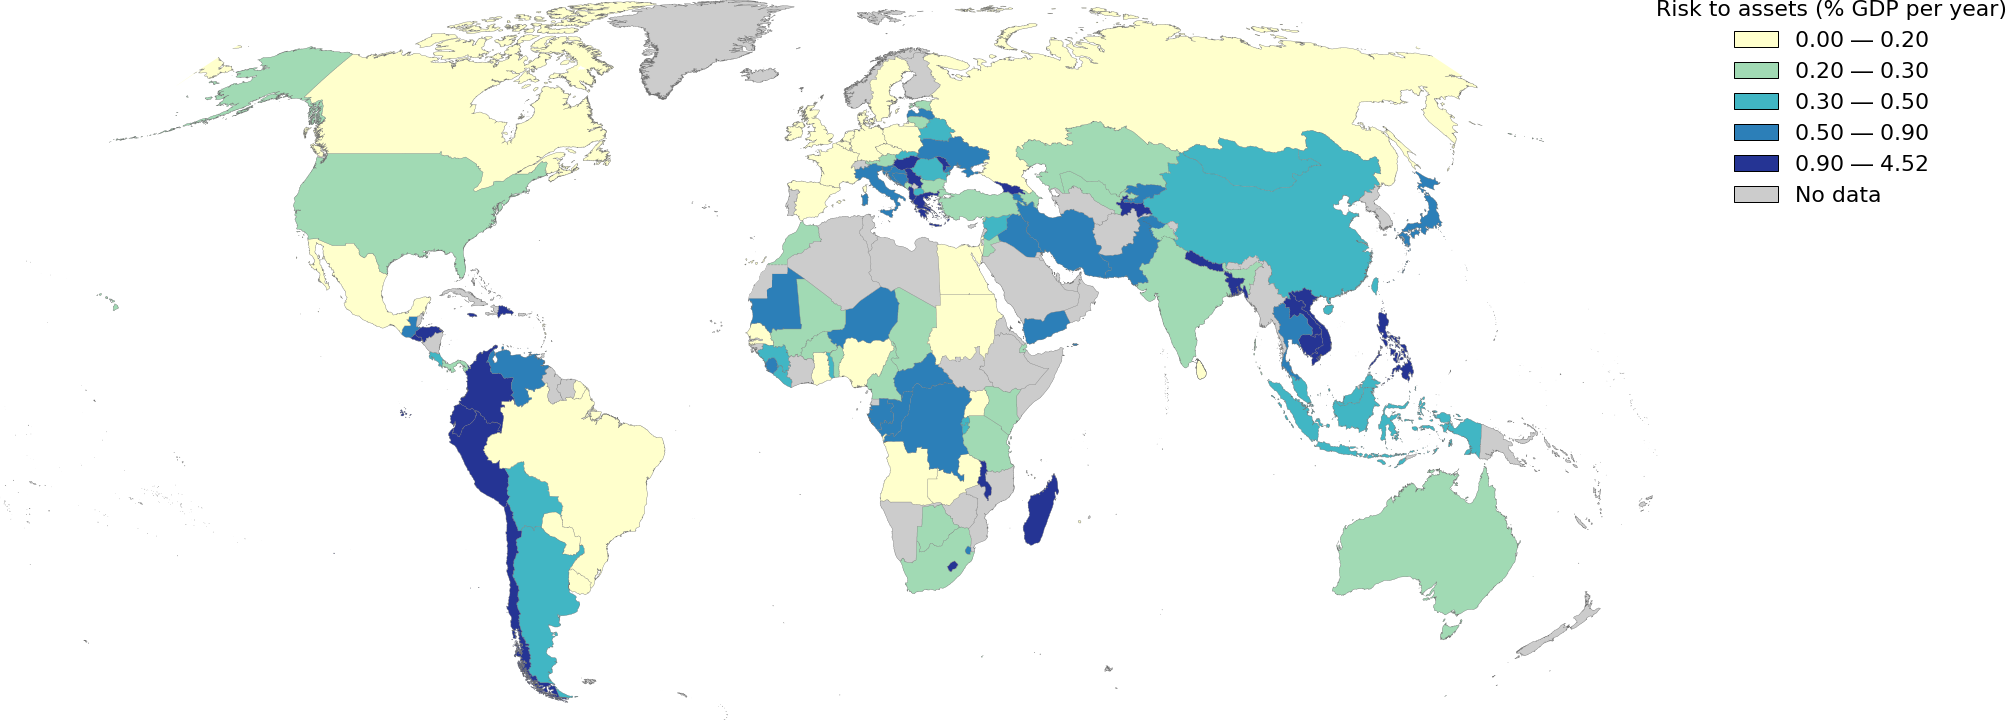

In [29]:
make_map_from_svg(
    series_in=100*df.risk_to_assets, #data 
    svg_file_path=svg_file_path,                  #path to blank map
    outname="risk_to_assets",           #base name for output  (will vreate img/map_of_asset_risk.png, img/legend_of_asset_risk.png, etc.)
    label="Risk to assets (% GDP per year)",
    new_title="Map of risk to assets",#title for the colored SVG
    outfolder="map/",
    bins   =[100*x for x in assetbins],
    bincolors = bluecolors,
    verbose=True,
    formater=".2f", #do not use .%
    no_data_color = "#cccccc"
)


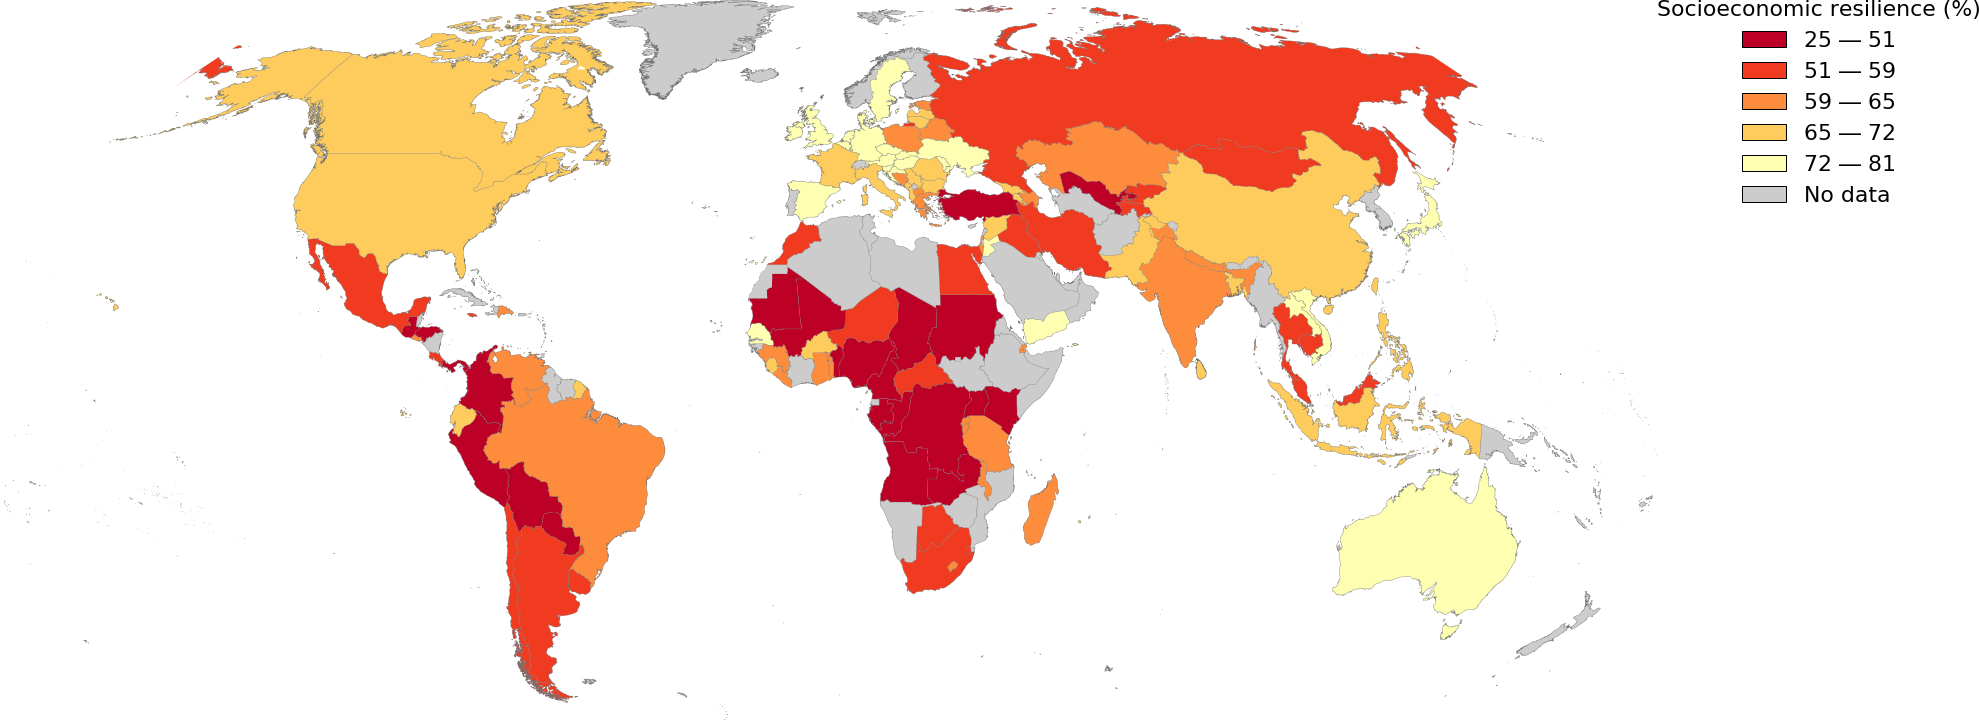

In [30]:
make_map_from_svg(
    series_in=100*df.resilience, #data 
    svg_file_path=svg_file_path,                  #path to blank map
    outname="resilience",           #base name for output  (will vreate img/map_of_asset_risk.png, img/legend_of_asset_risk.png, etc.)
    label="Socioeconomic resilience (%)",
    new_title="Map of resilience",#title for the colored SVG
    outfolder="map/",
    bins   =[100*x for x in resibins],
    bincolors = redcolors,
    verbose=True,
    formater =  ".0f", #not % in formater to avoid repetion of percent sign in legend
    keepSVG=True,
    no_data_color =  "#cccccc"
)

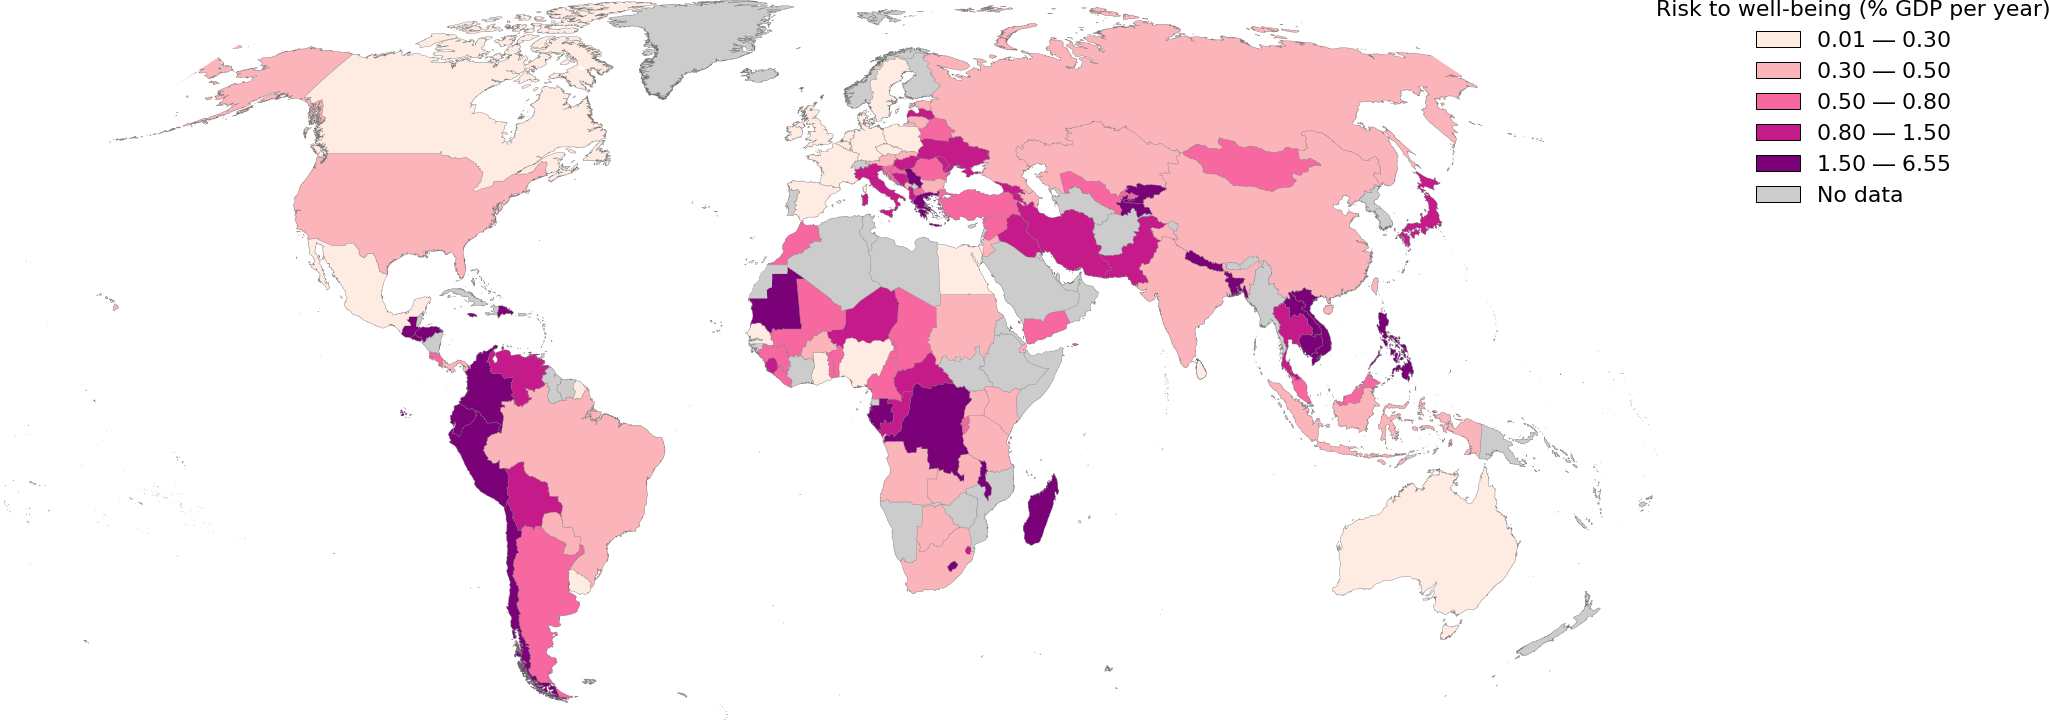

In [31]:
make_map_from_svg(
    series_in=100*df.risk, #data 
    svg_file_path=svg_file_path,                  #path to blank map
    outname="risk",           #base name for output  (will vreate img/map_of_asset_risk.png, img/legend_of_asset_risk.png, etc.)
    label="Risk to well-being (% GDP per year)",
    new_title="Map of risk to well-being",#title for the colored SVG
    outfolder="map/",
    bins   = [100*b for b in welfbins],
    bincolors = purplecolors,
    verbose=True,
    formater = ".2f",
    no_data_color = "#cccccc"
)